In [168]:
from sklearn.datasets import load_iris

In [169]:
iris = load_iris()

In [170]:
X = iris.data
Y = iris.target

In [171]:
import sklearn.model_selection as ms

In [172]:
XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size=0.3, random_state=42)

In [173]:
from sklearn import neighbors

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
k_neighbours = list(range(1, 21, 2))
n_grid = [{'n_neighbors': k_neighbours}]

In [176]:
model = neighbors.KNeighborsClassifier()
cv_knn = GridSearchCV(estimator=model, param_grid=n_grid, cv=ms.KFold(n_splits=10))
cv_knn.fit(XTrain, YTrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}])

In [177]:
best_k = cv_knn.best_params_['n_neighbors']
print("The best parameter is k={0}".format(best_k))

The best parameter is k=3


In [178]:
knnclf = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knnclf.fit(XTrain[:, 2:4], YTrain)

KNeighborsClassifier(n_neighbors=3)

In [179]:
y_pred = knnclf.predict(XTest[:, 2:4])

In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
confusion_matrix(YTest, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [182]:
from sklearn.metrics import classification_report

In [183]:
print(classification_report(YTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [184]:
import pandas as pd

In [185]:
bc = pd.read_csv("../data/breast-cancer-wisconsin.data")
bc = bc.dropna()

In [186]:
bc['Class'] = bc['Class'].astype('category')
bc['Class'].describe()

count     683
unique      2
top         2
freq      444
Name: Class, dtype: int64

In [187]:
X = bc.drop(['Class'], axis=1)
X = X.values
Y_raw = bc['Class'].values

In [188]:
from sklearn import preprocessing

In [189]:
label_enc = preprocessing.LabelEncoder()
label_enc.fit(Y_raw)
Y = label_enc.transform(Y_raw)

In [190]:
import sklearn.model_selection as cv

In [191]:
XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size=0.3, random_state=42)

In [192]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [284]:
pen_val = ['l2']
C_val = 2. ** np.arange(-5, 10, step=2)
grid_s = [{'C': C_val, 'penalty': pen_val}]
model = LogisticRegression()

In [285]:
from sklearn.model_selection import GridSearchCV

In [286]:
cv_logr = GridSearchCV(estimator=model, param_grid=grid_s, cv=ms.KFold(n_splits=10))

In [287]:
cv_logr.fit(XTrain, YTrain)
best_c = cv_logr.best_params_['C']
best_penalty = cv_logr.best_params_['penalty']

In [288]:
print("The best parameters are: cost={0}".format(best_c))

The best parameters are: cost=0.03125


In [289]:
b_clf = LogisticRegression(C=best_c, penalty=best_penalty)
b_clf.fit(XTrain, YTrain)

LogisticRegression(C=0.03125)

In [290]:
predict = b_clf.predict(XTest)
y_proba = b_clf.predict_proba(XTest)

In [291]:
print(b_clf.score(XTest, YTest))

0.6195121951219512


In [292]:
print(np.exp(b_clf.coef_))

[[0.99999934 1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]]


In [296]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [297]:
fpr, tpr, threshold = roc_curve(YTest, y_proba[:, 1])

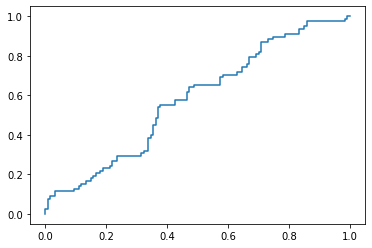

In [298]:
plt.plot(fpr, tpr)

In [299]:
print(auc(fpr, tpr))

0.5787401574803149


In [300]:
train = pd.read_csv("../data/Train_QuantumTunnel_Tweets.csv", encoding='utf-8')

In [301]:
print(train[62:64])

    Data_Science      Date                                              Tweet
62             1  10/10/15  And that is Chapter 3 of "Data Science and Ana...
63             1  29/11/15  See sklearn trees with #D3 https://t.co/UYsi0X...


In [302]:
import re

In [303]:
def tw_preprocess(tw):
	ptw = re.sub(r"http\S+", "", tw)
	ptw = re.sub(r"#", "", ptw)
	return ptw

In [304]:
train["Tweet"] = train["Tweet"].apply(tw_preprocess)

In [308]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, stop_words='english', binary=True)

In [309]:
X_train = vectorizer.fit_transform(train["Tweet"])

In [312]:
vectorizer.get_feature_names_out()[900:1011]

array(['outperforms', 'oven', 'overheard', 'overseas', 'package', 'pad',
       'pages', 'paid', 'paper', 'para', 'parameter', 'pardon',
       'parliamentary', 'parry_joe', 'participants', 'particle',
       'passionate', 'passwords', 'pat', 'patent', 'patterns', 'paul',
       'pay', 'peake', 'peek', 'penalty', 'penrose', 'people', 'pequeno',
       'perfect', 'person', 'personality', 'perspective', 'peterneubauer',
       'phase', 'phone', 'photo', 'photos', 'physical', 'physicists',
       'physics', 'physicsblogs', 'pi', 'piano', 'picture', 'pie',
       'pioneers', 'pivot', 'pivotalr', 'place', 'plagiarism',
       'planarrowspace', 'planet', 'planets', 'platform', 'play',
       'playing', 'playlist', 'plot', 'plugin', 'plush', 'pluto',
       'pocock', 'possible', 'post', 'postings', 'potato', 'power',
       'practical', 'practice', 'predef1', 'predict', 'predictive',
       'predicts', 'preferences', 'premvatika', 'prequel', 'presupuesto',
       'pretty', 'price', 'prime', '

In [313]:
from sklearn import naive_bayes

In [314]:
model = naive_bayes.MultinomialNB().fit(X_train, list(train["Data_Science"]))

In [315]:
ms.cross_val_score(naive_bayes.MultinomialNB(), X_train, train["Data_Science"], cv = 3)

array([0.71296296, 0.77777778, 0.72222222])

In [317]:
confusion_matrix(train["Data_Science"], model.predict(X_train))

array([[195,   1],
       [  0, 128]])

In [318]:
test = pd.read_csv("../data/Test_QuantumTunnel_tweets.csv", encoding='utf-8')
test["Tweet"] = test["Tweet"].apply(tw_preprocess)

In [319]:
X_test = vectorizer.transform(test["Tweet"])
pred = model.predict(X_test)

In [320]:
print(pred)

[1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1]


In [321]:
pred_probs = model.predict_proba(X_test)[:, 1]

In [322]:
pred_probs[102]

0.9996193373887406